1. A publishing firm wants to develop special printing machines for English. For this,
they need to determine the probability of occurrence of specific letters and words. You
are given two large text files (fileA and fileB).
NOTE: characters like whitespace, special characters and punctuation are to be
omitted.

# a) Determine the probability of each alphabet in the English language. Upper-case and lower-case alphabets are considered the same. List the top ten alphabets that occur in fileA.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fileName_A="fileA.txt"
fileName_B="fileB.txt"
fileName_C="fileC.txt"
fileName_D="fileD.txt"


#function for calculating frequency of each character
def calculate_freq(fileName):
  f=open(fileName,"r")
  freq={} #store frequency of each character
  for line in f:
    for character in line:
      if character.isalpha():
        if character.lower() in freq:
          freq[character.lower()]+=1
        else:
          freq[character.lower()]=1
  f.close()
  return freq



freqA=calculate_freq(fileName_A)
#total character
total_character=sum(freqA.values())

#sort wrt frequency
freqA=dict(sorted(freqA.items(),key=lambda x:x[1],reverse=True))
df_A=pd.DataFrame(freqA.items(),columns=['Character','Frequency'])

#calculating probability
df_A["Probability"]=df_A['Frequency']/total_character

print("Top ten alphabets that occur in fileA : \n")
print(df_A.loc[0:9])

#top ten characters
top_char=list(df_A["Character"].loc[0:9])
print()
print("Top 10 characters are : ",top_char)




Top ten alphabets that occur in fileA : 

  Character  Frequency  Probability
0         s        426     0.042388
1         z        415     0.041294
2         y        415     0.041294
3         f        410     0.040796
4         w        405     0.040299
5         t        403     0.040100
6         u        403     0.040100
7         x        402     0.040000
8         j        400     0.039801
9         k        398     0.039602

Top 10 characters are :  ['s', 'z', 'y', 'f', 'w', 't', 'u', 'x', 'j', 'k']


# b) The measure of uncertainty is determined by its entropy. Entropy should be computed as
             H=∑(−pi log pi )
# where pi is the probability of event i. If we consider the occurrence of alphabets in English as events of interest, determine the entropy. In other words, determine the uncertainty of alphabets in the English language using fileB.

In [80]:
freqB=calculate_freq(fileName_B)

#total character
total_character_B=sum(freqB.values())

#sort wrt character
freqB=dict(sorted(freqB.items(),key=lambda x:x[0]))
df_B=pd.DataFrame(freqB.items(),columns=['Character','Frequency'])

#calculating probability
df_B["Probability"]=df_B['Frequency']/total_character_B

#cal PlogP
df_B["-PlogP"]=(-1)*df_B["Probability"]*np.log2(df_B["Probability"])

print(df_B)

#calculating entropy
entropy=sum(df_B["-PlogP"])
print()
print("Entropy of characters : ",entropy)


   Character  Frequency  Probability    -PlogP
0          a      63844     0.079507  0.290422
1          b      11421     0.014223  0.087267
2          c      19349     0.024096  0.129518
3          d      37972     0.047288  0.208180
4          e     102429     0.127559  0.378947
5          f      17260     0.021495  0.119077
6          g      15506     0.019310  0.109962
7          h      46393     0.057775  0.237652
8          i      57146     0.071166  0.271332
9          j       1322     0.001646  0.015223
10         k       6159     0.007670  0.053894
11         l      32947     0.041030  0.189033
12         m      22636     0.028189  0.145139
13         n      55278     0.068840  0.265764
14         o      61867     0.077045  0.284925
15         p      12601     0.015692  0.094057
16         q        957     0.001192  0.011575
17         r      48538     0.060446  0.244698
18         s      50845     0.063319  0.252087
19         t      68576     0.085400  0.303138
20         u 

# c) Repeat (a) and (b) if word is considered as an event and use fileC and fileD for analysis.

In [81]:

#function for calculating frequency of each word
def calculate_word_freq(FileName):
  f=open(FileName,"r")
  freq={} #store frequency of each word
  for line in f:
    for word in line.split():
      if word.isalpha():
        if word.lower() in freq:
          freq[word.lower()]+=1
        else:
          freq[word.lower()]=1
  f.close()
  return freq


#function for calculating word frequency
def calculate_entropy(FileName):
  word_freq=calculate_word_freq(FileName)
  #total words
  total_word=sum(word_freq.values())

  word_df=pd.DataFrame(word_freq.items(),columns=['word','Frequency'])

  #calculating probability
  word_df["Probability"]=word_df['Frequency']/total_word

  #cal PlogP
  word_df["-PlogP"]=(-1)*word_df["Probability"]*np.log2(word_df["Probability"])

  #calculating entropy
  entropy=sum(word_df["-PlogP"])
  return entropy


In [82]:
#for fileB
entropy_of_words_fileB=calculate_entropy(fileName_B)
print("entropy of words of fileB : ",entropy_of_words_fileB)

entropy of words of fileB :  8.987889712229187


In [83]:
#for fileC
entropy_of_words_fileC=calculate_entropy(fileName_C)
print("entropy of words of fileC : ",entropy_of_words_fileC)

entropy of words of fileC :  8.498364595425894


In [84]:
#for fileD
entropy_of_words_fileD=calculate_entropy(fileName_D)
print("entropy of words of fileD : ",entropy_of_words_fileD)

entropy of words of fileD :  8.693448950098453


# 2. Imagine that you are playing with a random number generator that produces values between 0 and 1, perfectly spread (uniformly distributed). Now, what if you could generate n of these numbers, calculate their mean and variance, and then watch how these statistics change as n grows larger and larger? Does randomness settle into predictable patterns as you generate more numbers? Try experimenting with different values of n.What do you observe and why do you think it happens?

In [85]:
#generating random number between 0 and 1
def generate_uniform_random_numbers(n):
  random_numbers=np.random.uniform(0,1,n)
  return random_numbers

In [86]:
sample=[10,50,100,500,1000,5000,10000,50000,100000,500000,1000000]
mean_list_u=[]
variance_list_u=[]

#storing mean and variance for different n
for n in sample:
  random_numbers=generate_uniform_random_numbers(n)
  mean=np.mean(random_numbers)
  variance=np.var(random_numbers)
  mean_list_u.append(mean)
  variance_list_u.append(variance)

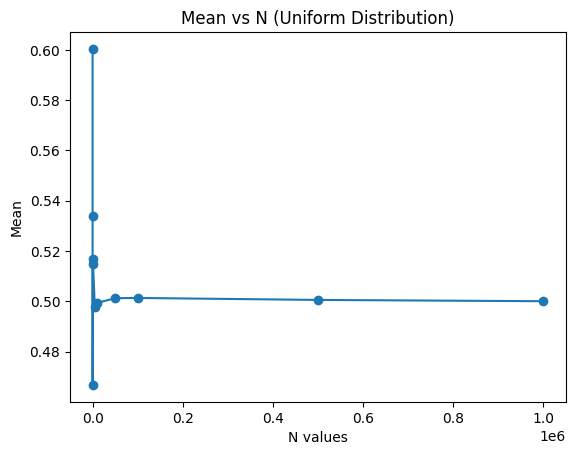

In [87]:

plt.plot(sample,mean_list_u,marker='o')
plt.xlabel("N values")
plt.ylabel("Mean")
plt.title("Mean vs N (Uniform Distribution)")
plt.show()

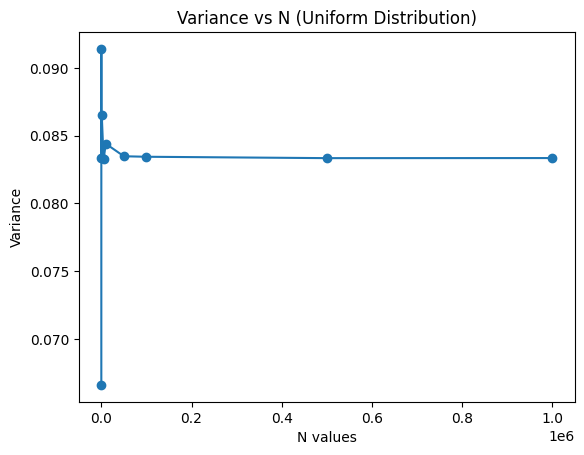

In [88]:
plt.plot(sample,variance_list_u,marker='o')
plt.xlabel("N values")
plt.ylabel("Variance")
plt.title("Variance vs N (Uniform Distribution)")
plt.show()

# 3. Repeat the same experiment as in Question 2 but for a Gaussian distribution having mean and standard deviation as 4 and 3 respectively

In [89]:
#generating gaussian distribution random number
def generate_gaussian_random_numbers(n):
  random_numbers=np.random.normal(4,3,n)
  return random_numbers

In [90]:
sample=[10,50,100,500,1000,5000,10000,50000,100000,500000,1000000]
mean_list_g=[]
variance_list_g=[]

#storing mean and variance for different n
for n in sample:
  random_numbers=generate_gaussian_random_numbers(n)
  mean=np.mean(random_numbers)
  variance=np.var(random_numbers)
  mean_list_g.append(mean)
  variance_list_g.append(variance)

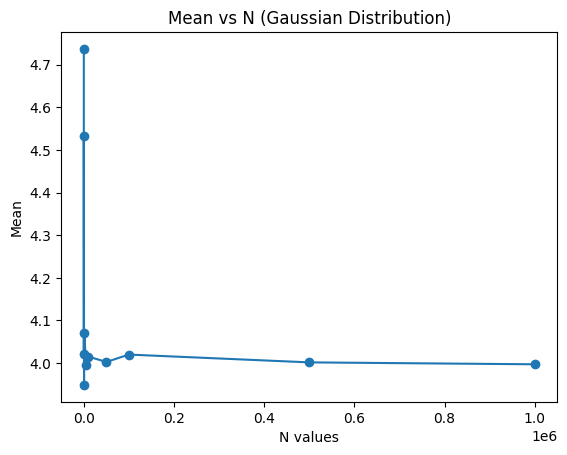

In [91]:
plt.plot(sample,mean_list_g,marker='o')
plt.xlabel("N values")
plt.ylabel("Mean")
plt.title("Mean vs N (Gaussian Distribution)")
plt.show()

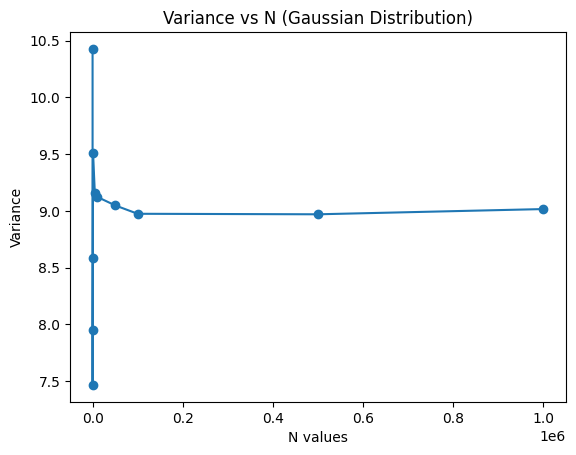

In [92]:
plt.plot(sample,variance_list_g,marker='o')
plt.xlabel("N values")
plt.ylabel("Variance")
plt.title("Variance vs N (Gaussian Distribution)")
plt.show()